In [1]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

In [2]:
from gspx.datasets import uk_weather
import networkx as nx
from gspx.utils.graph import nearest_neighbors
import numpy as np

df = uk_weather()
positions = df[['longitude', 'latitude']].to_numpy()

coords = df[['longitude', 'latitude']].to_numpy()
A = nearest_neighbors(
    positions,
    n_neighbors=10).todense()

xi, yi = np.where(A)
edgelist = [
    (xi[n], yi[n], {'weight': A[xi[n], yi[n]]})
    for n in range(len(xi))
]

g = nx.Graph()
g.add_edges_from(edgelist)

In [3]:
from gspx.signals import QuaternionSignal
import numpy as np

df_ = df[['humidity', 'pressure', 'temp', 'wind_speed']]
weather_data = (
    (df_ - df_.min()) /
    (df_.max() - df_.min())
).to_numpy()

s = QuaternionSignal([
    dict(array=row) for row in weather_data
])

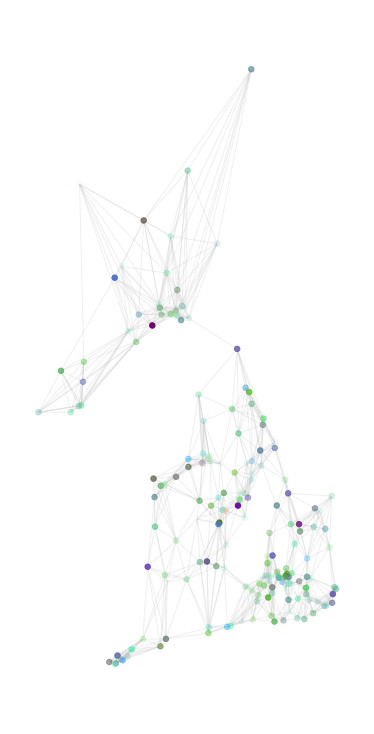

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 10))
node_color = [tuple(rgba) for rgba in s.to_rgba()]
nx.draw(
    g, pos=positions, node_size=30,
    edge_color=(0.8, 0.8, 0.8, 0.3),
    with_labels=False, node_color=node_color)

In [ ]:
import numpy as np

L = nx.laplacian_matrix(g)
eigvals, U = np.linalg.eig(L.toarray())

In [ ]:
from pyquaternion import Quaternion

q = Quaternion(a=1.0, b=2.0, c=3.0, d=4.0)
q

In [ ]:
import numpy as np
print(np.arctan(np.linalg.norm(q.vector) / q.scalar))

In [ ]:
s_abs = np.array([q.norm for q in s.samples])

plt.plot(np.sort(eigvals), np.sort(U.T @ s_abs), 'b.--')

In [ ]:
idx = np.abs(eigvals) > 10
hh = np.zeros(len(s_abs))
hh[idx] = 1.0

s_f = U @ ((U.T @ s_abs) * hh)